In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
'''Mathematical operation for the tensors'''
def mathtensors(a, b):
    c = tf.add(a, b)
    d = tf.subtract(b, 1)
    e = tf.multiply(c, d)
    
    return e

In [3]:
e_out = mathtensors(3.25, 9.4)
print (f"Tensor data output >>>>> ", e_out)

Tensor data output >>>>>  tf.Tensor(106.259995, shape=(), dtype=float32)


In [4]:
!pip install pandas

/bin/bash: pip: command not found


In [5]:
import pandas as pd

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [7]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/dipghosh/.keras/datasets/auto-mpg.data'

In [8]:
coloum_name = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 
               'Weight', 'Acceleration', 'Model', 'Origin']
raw_dataset =  pd.read_csv(dataset_path, names=coloum_name, 
                           na_values ="?", comment="\t", sep=" ", skipinitialspace = True)

In [10]:
dataset =  raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [11]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [12]:
dataset = dataset.dropna()

In [13]:
origin = dataset.pop('Origin')

In [14]:
dataset['Amarica'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Asia'] = (origin == 3)*1.0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Amarica,Europe,Asia
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [15]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

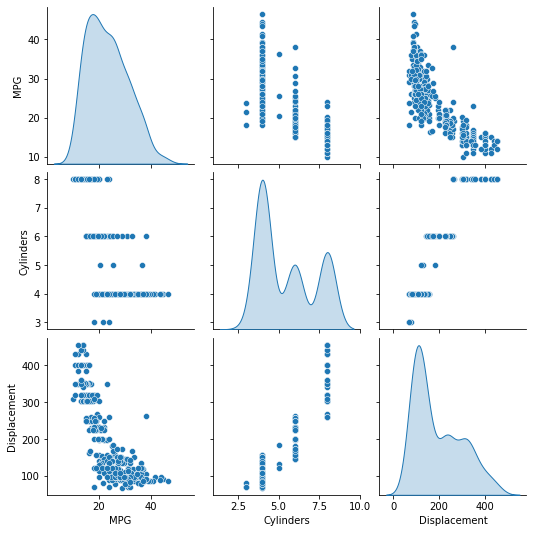

In [17]:
# !echo ploting the train dataset nodes

sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement']], diag_kind="kde")

In [18]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Amarica,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Asia,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [19]:
train_lable = train_dataset.pop("MPG")
test_lable = test_dataset.pop("MPG")

In [21]:
def normalize(x):
    return (x - train_stats['mean'])/ train_stats['std']
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)


In [30]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.sigmoid, input_shape = [len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.sigmoid),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
    return model

In [31]:
model = build_model()

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [35]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print("")
        print(".", end='')
        
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_lable, epochs = EPOCHS, 
    validation_split = 0.2, verbose=0, callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.522057,1.642360,5.522057,6.885946,2.006960,6.885946,995
996,5.575648,1.645206,5.575648,6.907609,1.960024,6.907609,996
997,5.505767,1.658951,5.505767,6.925333,2.020032,6.925333,997
998,5.602716,1.675191,5.602716,6.876226,2.008167,6.876226,998
999,5.457609,1.643102,5.457609,7.450197,2.162170,7.450197,999


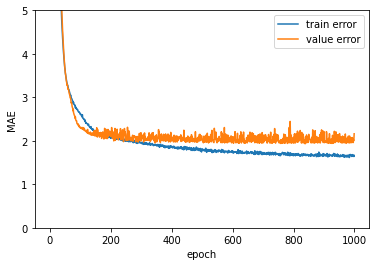

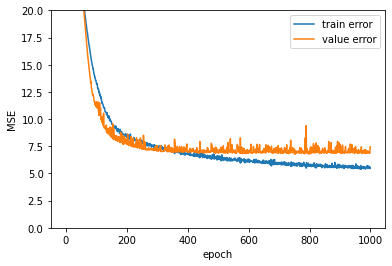

In [41]:
def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    
    plt.plot(hist['epoch'], hist['mae'], label= 'train error')
    plt.plot(hist['epoch'], hist['val_mae'], label= 'value error')
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('MSE')
    
    plt.plot(hist['epoch'], hist['mse'], label= 'train error')
    plt.plot(hist['epoch'], hist['val_mse'], label= 'value error')
    plt.legend()
    plt.ylim([0,20])
    

plot_history(history)

In [44]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)
history = model.fit(
    normed_train_data, train_lable, epochs = EPOCHS, 
    validation_split = 0.2, verbose=0, callbacks = [early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.................

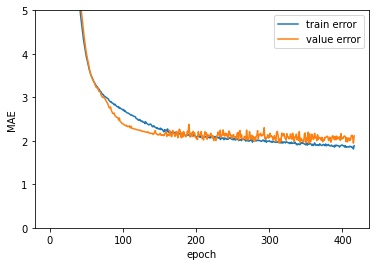

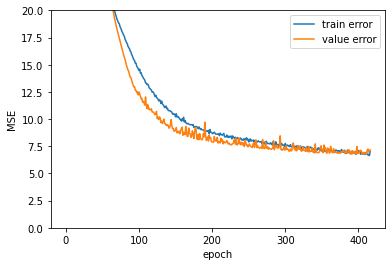

In [45]:
plot_history(history)

In [47]:
loss, mae, mse = model.evaluate(normed_test_data, test_lable, verbose=0)

In [48]:
print(f"loss -- {loss}, mae -- {mae}, mse -- {mse}")

loss -- 6.114339351654053, mae -- 1.8857604265213013, mse -- 6.114339351654053


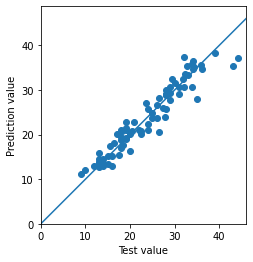

In [54]:
test_prediction = model.predict(normed_test_data).flatten()

plt.scatter(test_lable, test_prediction)
plt.xlabel('Test value')
plt.ylabel('Prediction value')

plt.axis('equal')
plt.axis('square')

plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])

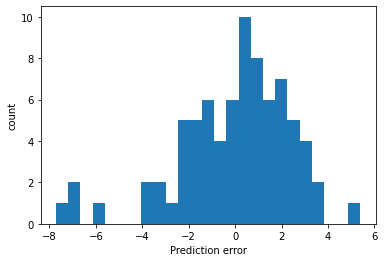

In [55]:
error = test_prediction - test_lable
plt.hist(error, bins = 25)

plt.xlabel("Prediction error")
_ = plt.ylabel("count")